# Dados de vendas de produtos
Ajude a empresa a encontrar tendências e insights

- Q1- Total de vendas unitárias do produto 1 
- Q2- Total de vendas unitárias do produto 2 
- Q3- Total de vendas unitárias do produto 3
- Q4- Total de vendas unitárias do produto 4 

- S1- Receita total do produto 1
- S2- Receita total do produto 2
- S3- Receita total do produto 3
- S4- Receita total do produto 4

1) Existe alguma tendência nas vendas de todos os quatro produtos durante determinados meses?

2) De todos os quatro produtos, qual produto teve as maiores vendas em todos os anos determinados?

3) A empresa tem todos os seus centros de varejo fechados no dia 31 de dezembro de cada ano. Sr: Hariharan , o CEO , adoraria obter uma estimativa sobre não: de unidades de cada produto que poderiam ser vendidas em 31 de dezembro, todos os anos, se todos os seus centros de varejo fossem mantidos abertos.

4) O CEO está considerando uma ideia para abandonar a produção de qualquer um dos produtos. Ele quer que você analise esses dados e sugira se sua ideia resultaria em um enorme revés para a empresa.

5) O CEO também gostaria de prever as vendas e receitas para o ano de 2024. Ele quer que você dê uma estimativa anual com a melhor precisão possível.

In [1]:
import pandas as pd # biblioteca usada para manipulação e análise de dados
import numpy as np
import matplotlib.pyplot as plt # biblioteca para plotagens e visualizações
import seaborn as sns # biblioteca para visualizações
from datetime import datetime as dt

# Você pode usar o código a seguir para exibir e armazenar gráficos Matplotlib em um bloco de anotações Python Jupyter:
%matplotlib inline

# Para ignorar avisos
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'..\DtScience\statsfinal.csv')
display(df)

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...,...
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62
4598,4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21


In [3]:
df = df.drop("Unnamed: 0", axis=1) # Exclui a COLUNA "Unnamed: 0"
display(df)

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04
...,...,...,...,...,...,...,...,...,...
4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67
4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21


In [4]:
df.head(3) # ver as 5 ou quantas linhas quisermos 

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85


In [5]:
df.tail(3) # ver as 5 ou quantas linhas quisermos  

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62
4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21
4599,03-02-2023,1234,3854,2321,406,3911.78,24434.36,12579.82,2894.78


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4600 non-null   object 
 1   Q-P1    4600 non-null   int64  
 2   Q-P2    4600 non-null   int64  
 3   Q-P3    4600 non-null   int64  
 4   Q-P4    4600 non-null   int64  
 5   S-P1    4600 non-null   float64
 6   S-P2    4600 non-null   float64
 7   S-P3    4600 non-null   float64
 8   S-P4    4600 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 323.6+ KB


In [7]:
# Verificando valores nulos
df.isnull().sum()

Date    0
Q-P1    0
Q-P2    0
Q-P3    0
Q-P4    0
S-P1    0
S-P2    0
S-P3    0
S-P4    0
dtype: int64

Q-P1    18960506
Q-P2     9799295
Q-P3    14470404
Q-P4     5168100
dtype: int64


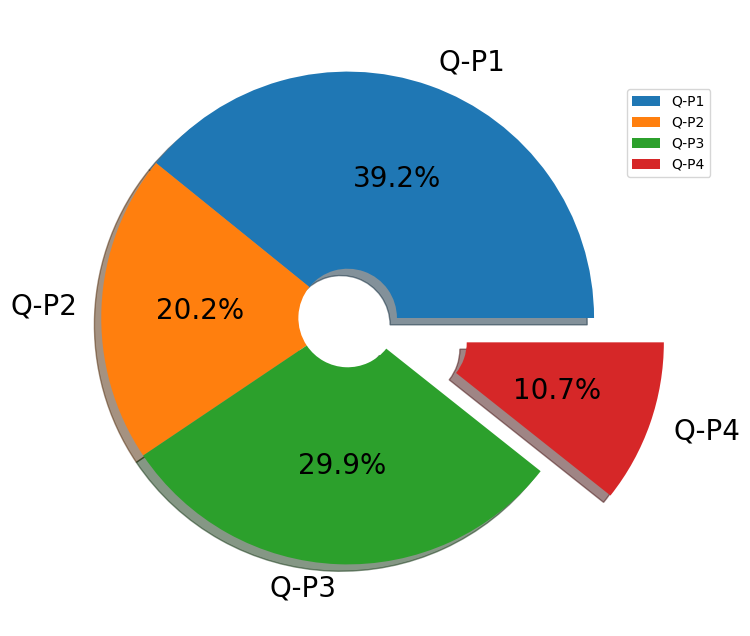

In [8]:
# Total de vendas unitárias Produto 1, Produto 2, Produto 3, Produto 4

grafico = df[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum()
print(grafico)
plt.figure(figsize=(8,8))
plt.pie(grafico, 
        labels=df[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum().index,
        shadow=True, 
        autopct="%0.01f%%",
        textprops={"fontsize":20},
        wedgeprops={'width': 0.8},
        explode=[0,0,0,0.3])
plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.8));

S-P1    60104804.02
S-P2    62127530.30
S-P3    78429589.68
S-P4    36848553.00
dtype: float64


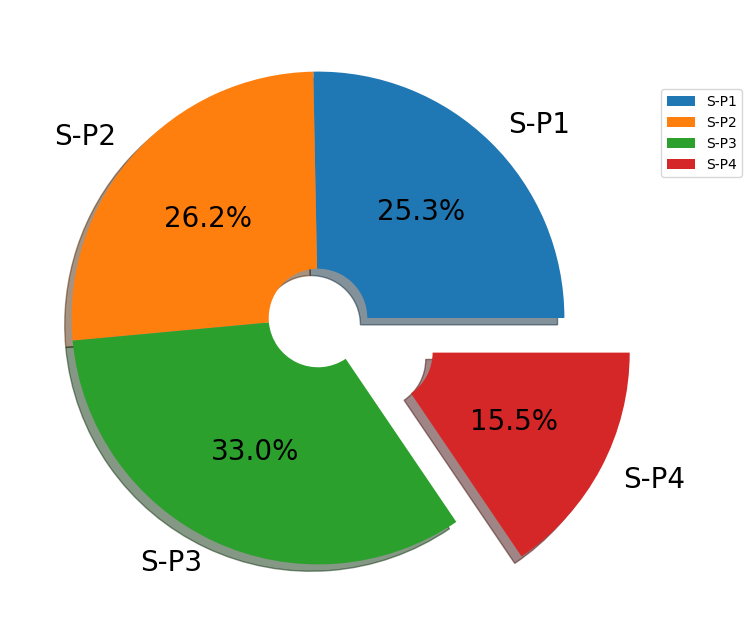

In [9]:
# Porcentagem total da receita das vendas do Produto 1, Produto 2, Produto 3, Produto 4

grafico = df[["S-P1","S-P2","S-P3","S-P4"]].sum()
print(grafico)
plt.figure(figsize=(8,8))
plt.pie(grafico, 
        labels=df[["S-P1","S-P2","S-P3","S-P4"]].sum().index,
        shadow=True, 
        autopct="%0.01f%%",
        textprops={"fontsize":20},
        wedgeprops={'width': 0.8},
        explode=[0,0,0,0.3])
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.8));

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [11]:
display(df['Date'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: Date, Length: 4600, dtype: bool

In [12]:
df[df['Date'].isnull()]

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
109,NaT,4986,342,4978,558,15805.62,2168.28,26980.76,3978.54
170,NaT,4632,3930,523,1581,14683.44,24916.20,2834.66,11272.53
473,NaT,2242,401,5926,789,7107.14,2542.34,32118.92,5625.57
534,NaT,325,3476,4588,1771,1030.25,22037.84,24866.96,12627.23
836,NaT,1003,256,1346,1449,3179.51,1623.04,7295.32,10331.37
897,NaT,2509,2666,4146,593,7953.53,16902.44,22471.32,4228.09
1200,NaT,597,709,5470,1994,1892.49,4495.06,29647.40,14217.22
1261,NaT,7681,1235,347,1087,24348.77,7829.90,1880.74,7750.31
1564,NaT,5333,833,3494,618,16905.61,5281.22,18937.48,4406.34
1625,NaT,3870,2779,3246,1290,12267.90,17618.86,17593.32,9197.70


In [13]:
## Preenchendo os valores de NaT com média de tempo

df["Date"].fillna(df["Date"].mean(),inplace=True)

In [14]:
df['Date'].isnull().sum()

0

In [15]:
#buscando mês, dia da semana, dia do mês e ano

df["month"]=df["Date"].dt.month_name()
df["day"]=df["Date"].dt.day_name()
df["dayoftheweek"]=df["Date"].dt.weekday
df["year"]=df["Date"].dt.year
df.sample()

,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,month,day,dayoftheweek,year
1649,2014-12-24,4226,2761,2177,556,13396.42,17504.74,11799.34,3964.28,December,Wednesday,2,2014


month
October      416
July         403
January      403
August       390
September    390
November     390
December     390
June         378
March        372
May          372
April        360
February     336
Name: count, dtype: int64


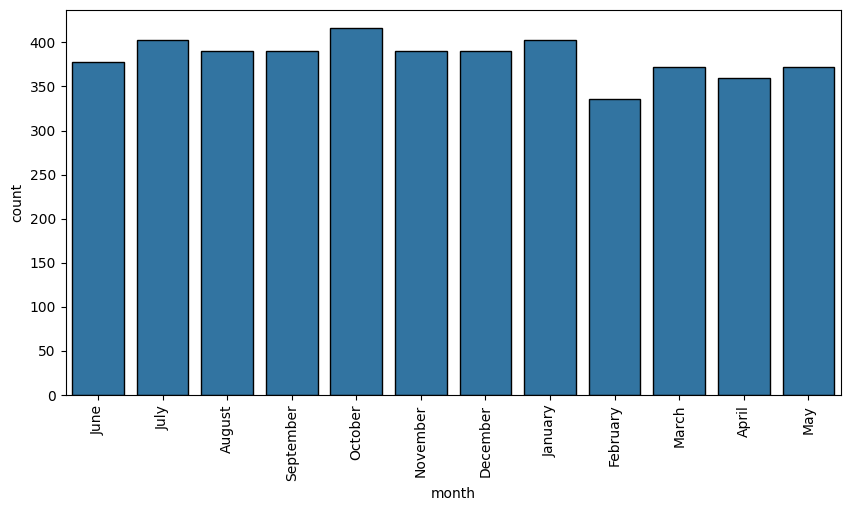

In [16]:
# Qual é o mês que mais ocorre

print(df["month"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="month",data=df,edgecolor="black")
plt.xticks(rotation=90);

day
Saturday     678
Wednesday    655
Sunday       654
Thursday     654
Friday       654
Tuesday      653
Monday       652
Name: count, dtype: int64


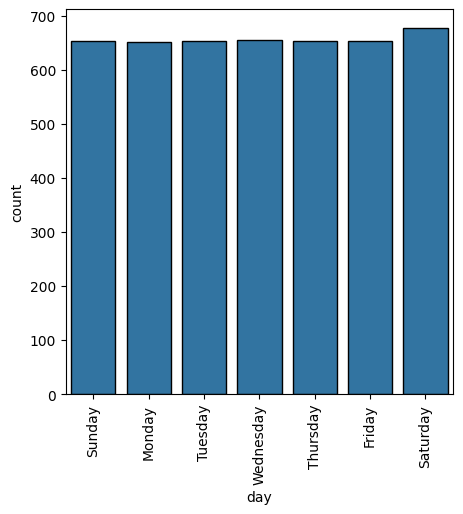

In [17]:
# qual é o dia que mais ocorre

print(df["day"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="day",data=df,edgecolor="black")
plt.xticks(rotation=90);

year
2016    387
2011    362
2013    362
2014    362
2015    362
2017    362
2018    362
2019    362
2021    362
2022    362
2012    361
2020    361
2010    199
2023     34
Name: count, dtype: int64


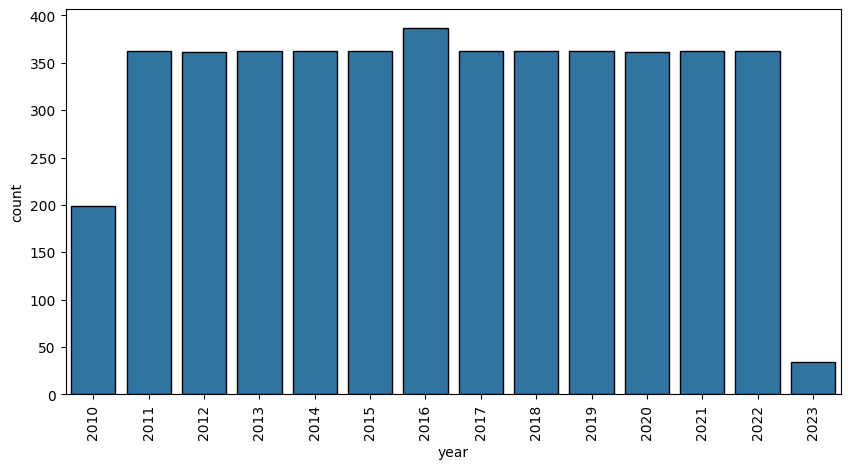

In [18]:
# qual é o ano que mais ocorre

print(df["year"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="year",data=df,edgecolor="black")
plt.xticks(rotation=90);

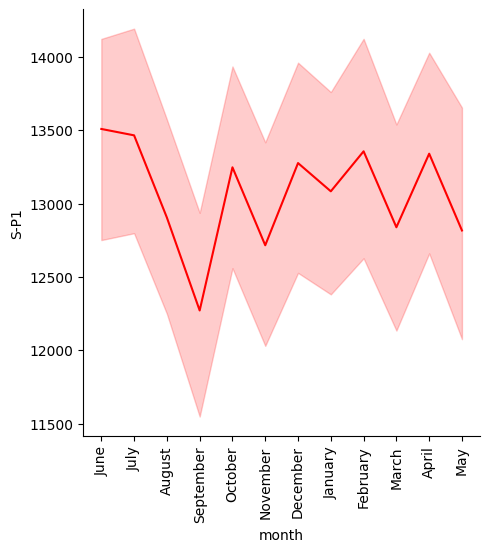

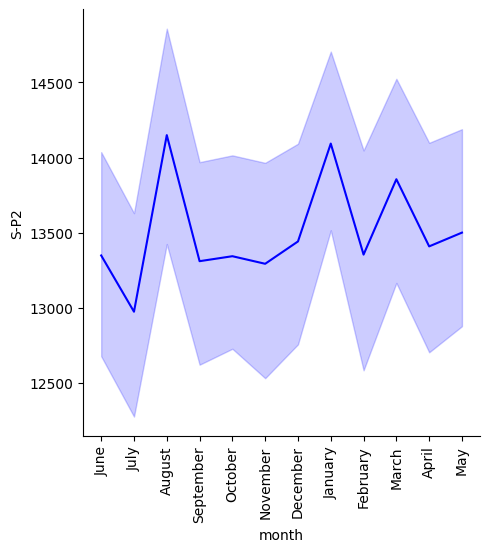

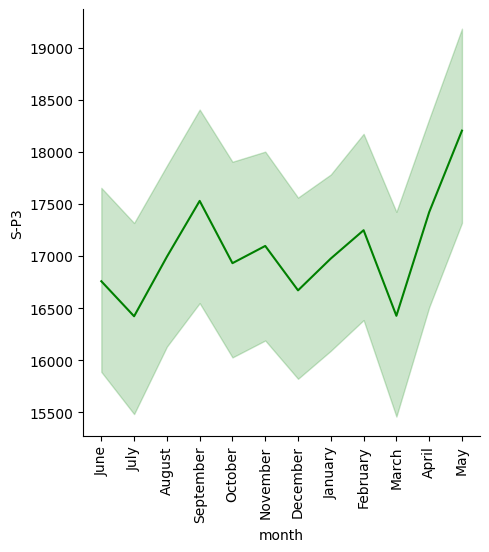

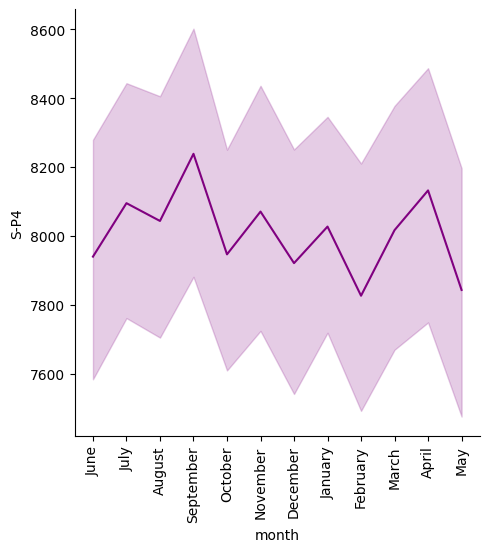

In [20]:
# Distribuição mensal da receita

sns.relplot(x="month",y="S-P1", data=df, kind="line", height=5, color="red")
plt.xticks(rotation=90);
sns.relplot(x="month",y="S-P2", data=df, kind="line", height=5, color="blue")
plt.xticks(rotation=90); 
sns.relplot(x="month",y="S-P3", data=df, kind="line", height=5, color="green")
plt.xticks(rotation=90);
sns.relplot(x="month",y="S-P4", data=df, kind="line", height=5, color="purple")
plt.xticks(rotation=90);

In [21]:
## Em que mês a receita atingiu o pico

df.groupby("month")[["S-P1","S-P2","S-P3","S-P4"]].sum()

,S-P1,S-P2,S-P3,S-P4
month,,,,
April,4802375.65,4826870.24,6272544.32,2927620.78
August,5032774.42,5518177.50,6628101.74,3137000.36
December,5177646.59,5241931.02,6502103.00,3089200.84
February,4487670.73,4486678.52,5796061.28,2629665.21
January,5272626.13,5679403.70,6842229.68,3234973.69
July,5426396.49,5228021.06,6618524.60,3262381.41
June,5106248.68,5045340.30,6335204.94,3001309.33
March,4775839.58,5154185.42,6111066.26,2982307.88
May,4767692.68,5021875.96,6773238.50,2917653.04


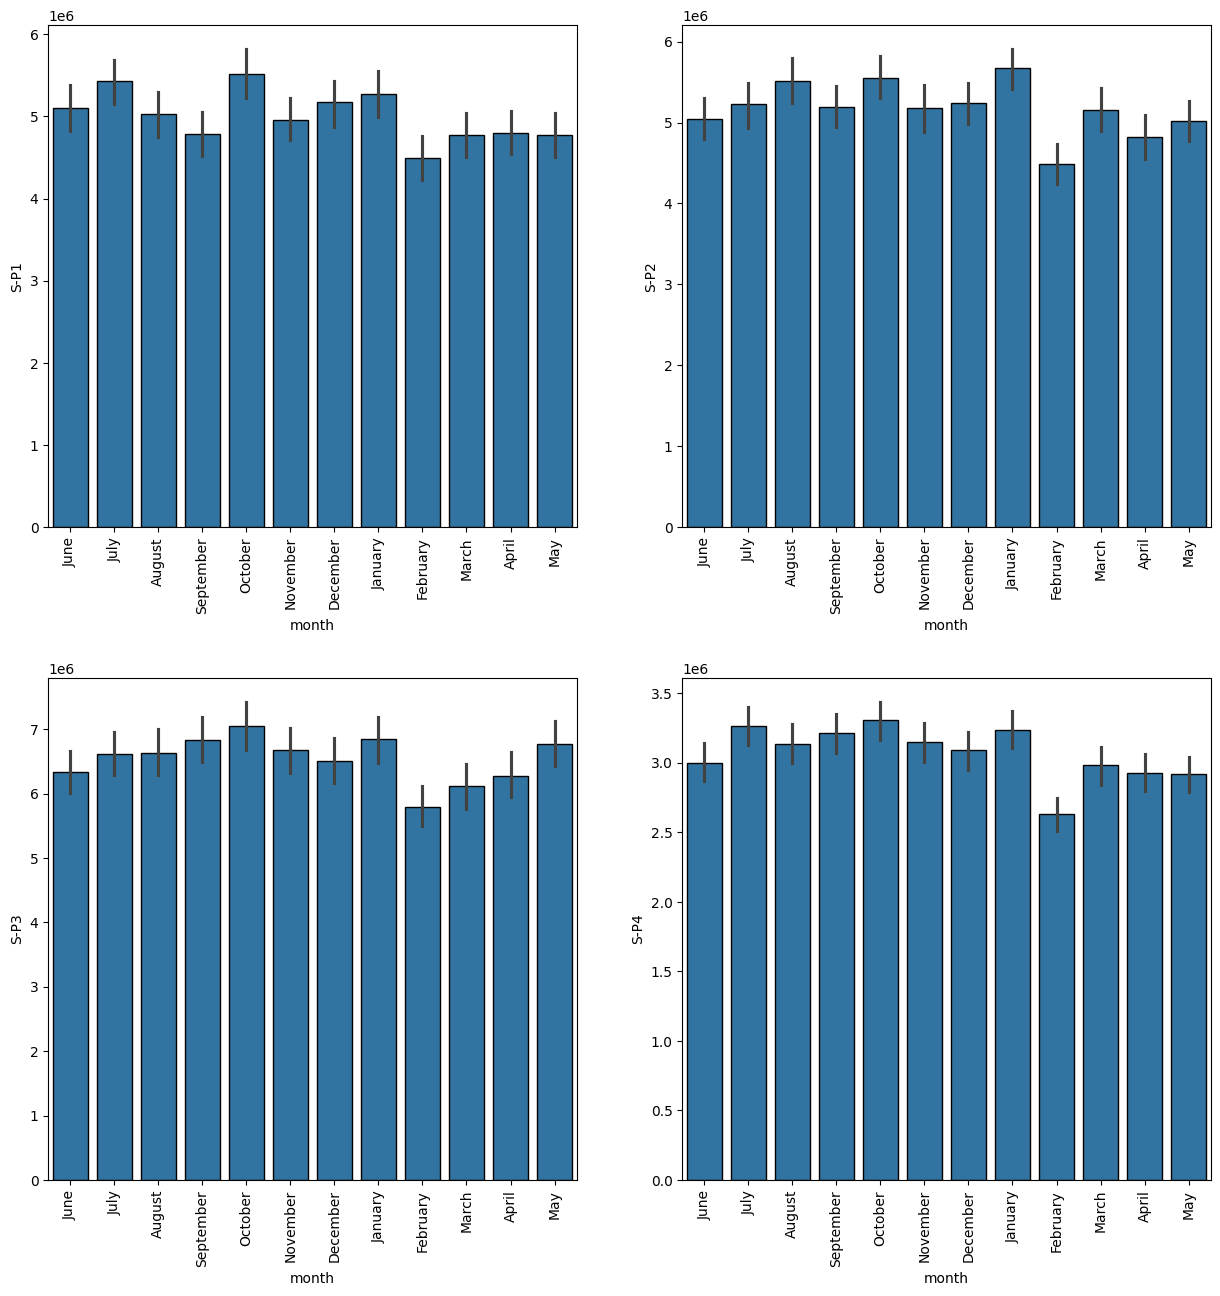

In [22]:
plt.figure(figsize=(15,15),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="month",y="S-P1",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x="month",y="S-P2",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.barplot(x="month",y="S-P3",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.barplot(x="month",y="S-P4",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.3);

In [23]:
## Em qual mês as vendas unitárias foram maiores no Produto 1, Produto 2, Produto 3, Produto 4

df.groupby ("month")[["Q-P1","Q-P2","Q-P3","Q-P4"]].sum()

,Q-P1,Q-P2,Q-P3,Q-P4
month,,,,
April,1514945,761336,1157296,410606
August,1587626,870375,1222897,439972
December,1633327,826803,1199650,433268
February,1415669,707678,1069384,368817
January,1663289,895805,1262404,453713
July,1711797,824609,1221130,457557
June,1610804,795795,1168857,420941
March,1506574,812963,1127503,418276
May,1504004,792094,1249675,409208


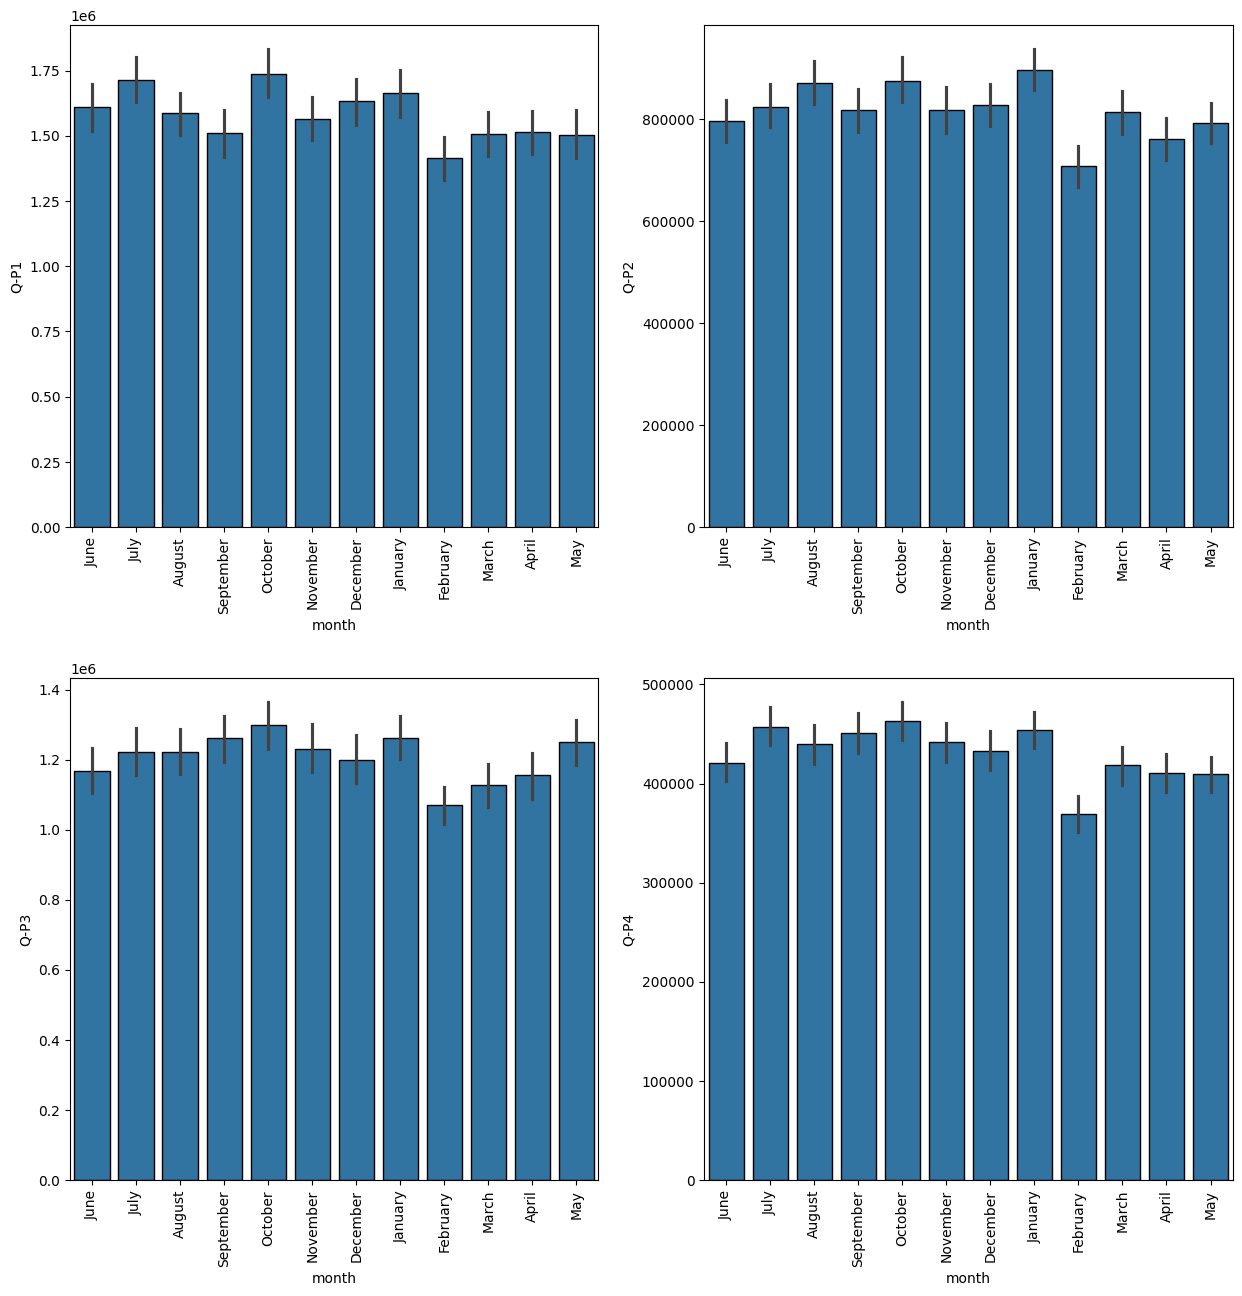

In [24]:
plt.figure(figsize=(15,15),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="month",y="Q-P1",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x="month",y="Q-P2",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.barplot(x="month",y="Q-P3",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.barplot(x="month",y="Q-P4",data=df,edgecolor="black",estimator=sum)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.3);

In [25]:
week_t=df[df["dayoftheweek"]<5]
weekend_t=df[df["dayoftheweek"]>=5]
print(week_t.groupby("day")[["S-P1","S-P2","S-P3","S-P4"]].sum())

                 S-P1        S-P2         S-P3        S-P4
day                                                       
Friday     8838549.62  8898088.56  11056312.20  5142733.53
Monday     8590452.74  8675681.36  11016047.02  5305654.03
Thursday   8499752.70  9010725.00  10895462.86  5112751.88
Tuesday    8458961.14  8590928.24  11084062.60  5253576.51
Wednesday  8476478.56  8995331.48  11328873.16  5139403.82


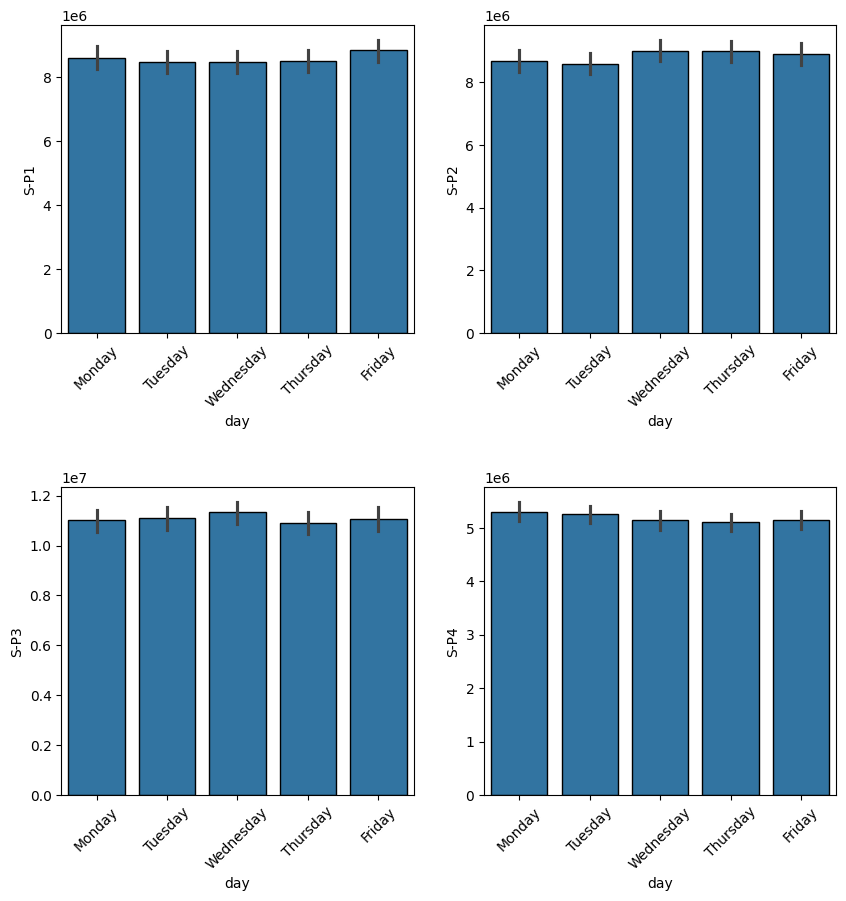

In [26]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="S-P1",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="S-P2",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="S-P3",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="S-P4",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

In [27]:
print(weekend_t.groupby("day")[["S-P1","S-P2","S-P3","S-P4"]].sum())

                S-P1        S-P2         S-P3        S-P4
day                                                      
Saturday  8845850.13  9233373.12  12064199.14  5612194.12
Sunday    8394759.13  8723402.54  10984632.70  5282239.11


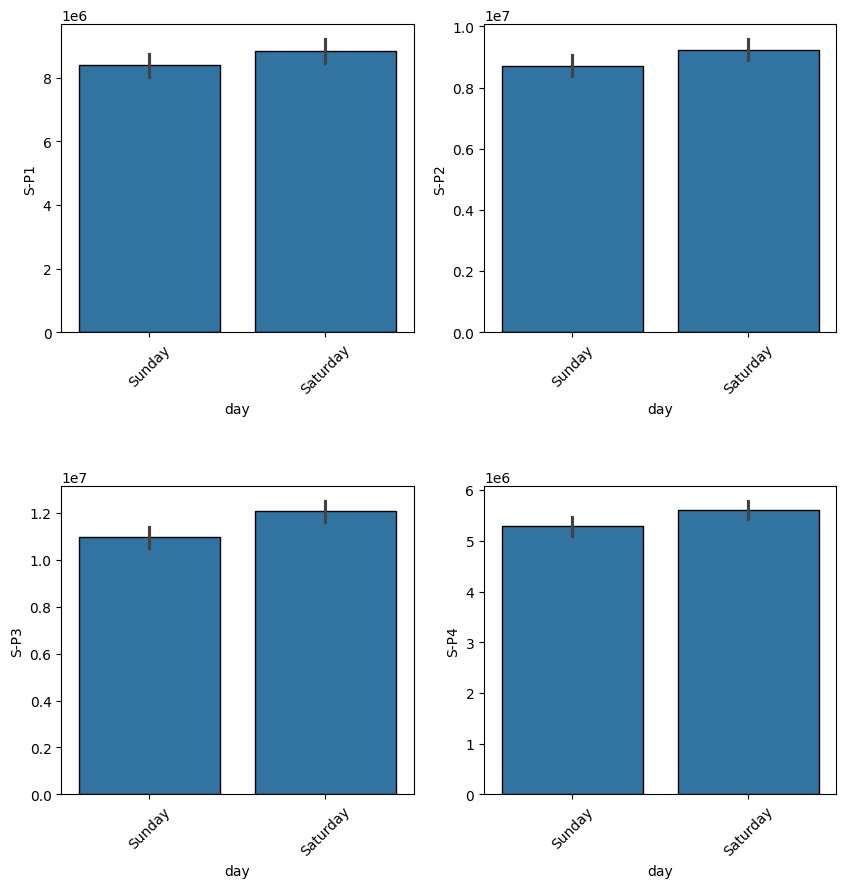

In [28]:
plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="S-P1",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="S-P2",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="S-P3",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="S-P4",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

In [29]:
df.groupby("year")[["S-P1","S-P2","S-P3","S-P4"]].agg(["sum"])

,S-P1,S-P2,S-P3,S-P4
,sum,sum,sum,sum
year,,,,
2010,2543459.01,2720100.92,3385462.08,1567523.37
2011,4542819.22,4741147.10,6235075.86,2921603.06
2012,4771163.83,4861987.50,6173911.16,2965210.14
2013,4833682.57,4771369.88,6017809.74,2868491.69
2014,4954522.97,4979797.38,6265406.18,2865119.20
2015,4669720.66,4833806.20,5987988.90,2933224.96
2016,5096066.64,5313116.54,6507718.12,3096444.92
2017,4628545.53,5085909.96,6269568.74,2969944.46


In [30]:
## Qual foi a receita média, máxima e mínima

df[["S-P1","S-P2","S-P3","S-P4"]].agg(["sum","max","min","mean"])

,S-P1,S-P2,S-P3,S-P4
sum,6.010480e+07,6.212753e+07,7.842959e+07,3.684855e+07
max,2.535366e+04,2.534732e+04,3.252000e+04,1.426000e+04
min,8.051800e+02,1.591340e+03,1.355000e+03,1.782500e+03
mean,1.306626e+04,1.350598e+04,1.704991e+04,8.010555e+03


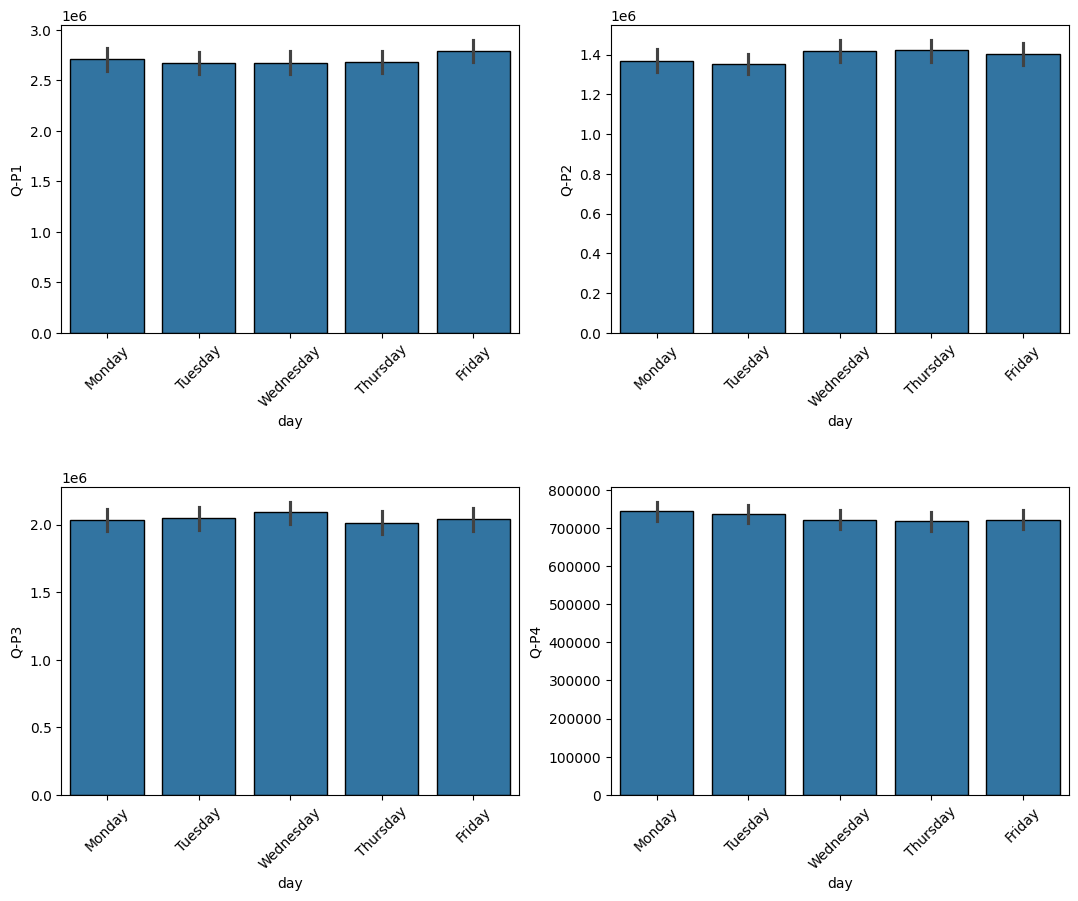

In [31]:
plt.figure(figsize=(13,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="Q-P1",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="Q-P2",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="Q-P3",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="Q-P4",data=week_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

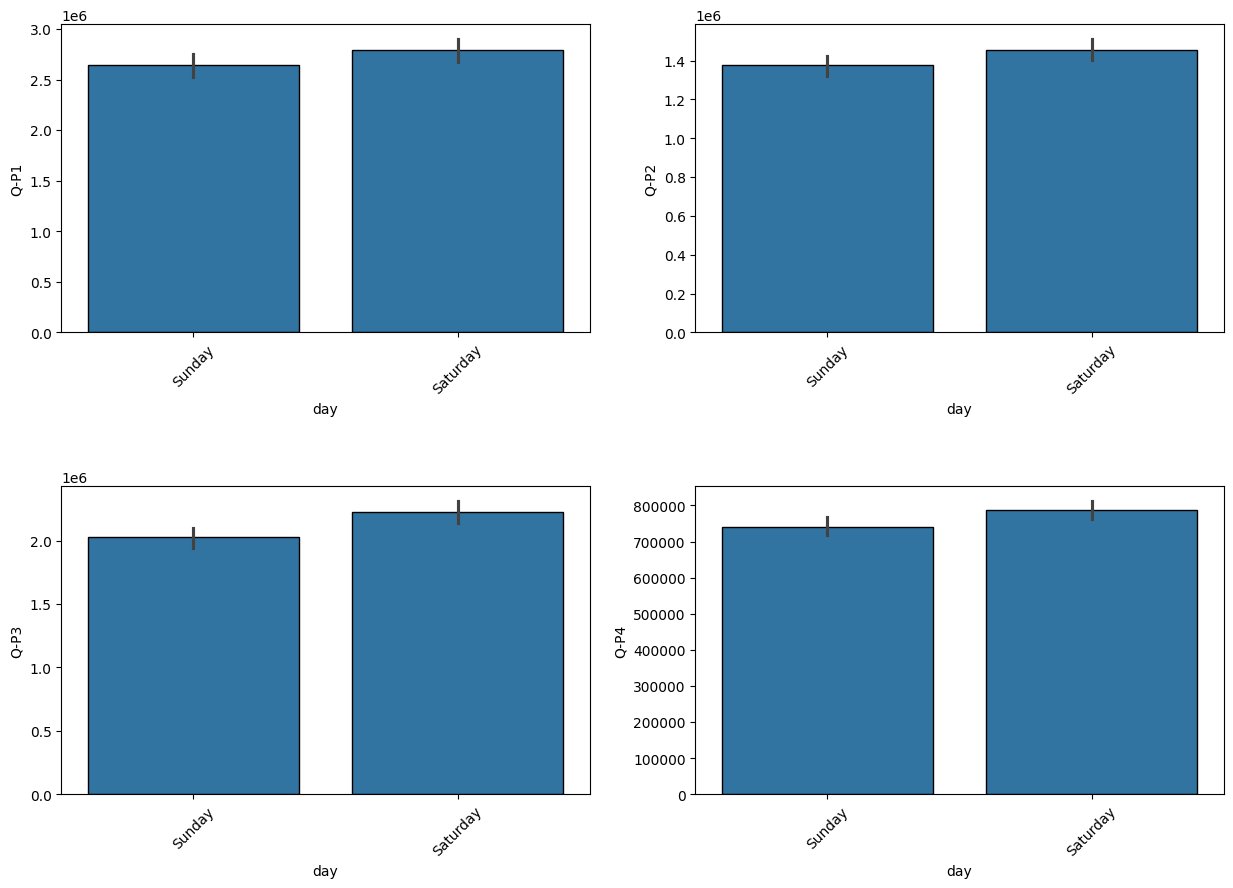

In [32]:
plt.figure(figsize=(15,10),dpi=100)
plt.subplot(2,2,1)
sns.barplot(x="day",y="Q-P1",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,2)
sns.barplot(x="day",y="Q-P2",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,3)
sns.barplot(x="day",y="Q-P3",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45);
plt.subplot(2,2,4)
sns.barplot(x="day",y="Q-P4",data=weekend_t,edgecolor="black",estimator=sum)
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5);

# Percepções
- Adicionadas as colunas mês, dia e dia da semana e alteração do dtype de data de object para datetime64 por meio da engenharia de recursos.

- Elimine as colunas sem nome, pois não estava fornecendo nenhuma informação útil.

- S-P3 obteve a maior receita, mas a venda unitária de Q-P1 é maior.

- Em 2016, a maior receita, a maior receita gerada e às sextas e sábados, a maior receita gerada.

- Nos dias de semana e fim de semana, o S-P3 tem a maior receita, enquanto no fim de semana e nos dias de semana o Q-P1 tem mais unidades vendidas.

- No mês de outubro, a venda unitária e a receita atingiram o pico.